**Task 4 -Data Collection in the Wild**

**Question 1** - Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

C:\Users\Vansh\AppData\Local\Temp\ipykernel_10516\1880933271.py:100: UserWarning: Using default sampling frequency set in configuration file.
  X_tsfel_train = tsfel.time_series_features_extractor(selected_features, X_train_final, window_size=1, verbose=0)


C:\Users\Vansh\AppData\Local\Temp\ipykernel_10516\1880933271.py:101: UserWarning: Using default sampling frequency set in configuration file.
  X_tsfel_test = tsfel.time_series_features_extractor(selected_features, X_test_final, window_size=1, verbose=0)


Metrics of RAW Accelerometer Data
Test Accuracy: 0.10570190063354451
Test Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.00      0.00      0.00       499
           SITTING       0.19      0.55      0.28       500
          STANDING       0.03      0.06      0.04       500
           WALKING       0.21      0.01      0.02       500
WALKING_DOWNSTAIRS       0.06      0.01      0.01       500
  WALKING_UPSTAIRS       0.18      0.00      0.01       500

          accuracy                           0.11      2999
         macro avg       0.11      0.11      0.06      2999
      weighted avg       0.11      0.11      0.06      2999



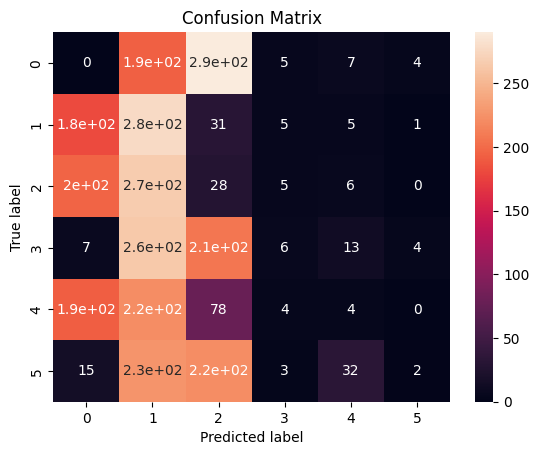

Metrics of TSFEL Data
Test Accuracy: 0.1673891297099033
Test Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.16      0.28      0.20       499
           SITTING       0.16      0.20      0.18       500
          STANDING       0.18      0.33      0.24       500
           WALKING       0.11      0.02      0.03       500
WALKING_DOWNSTAIRS       0.18      0.14      0.16       500
  WALKING_UPSTAIRS       0.12      0.03      0.05       500

          accuracy                           0.17      2999
         macro avg       0.15      0.17      0.14      2999
      weighted avg       0.15      0.17      0.14      2999



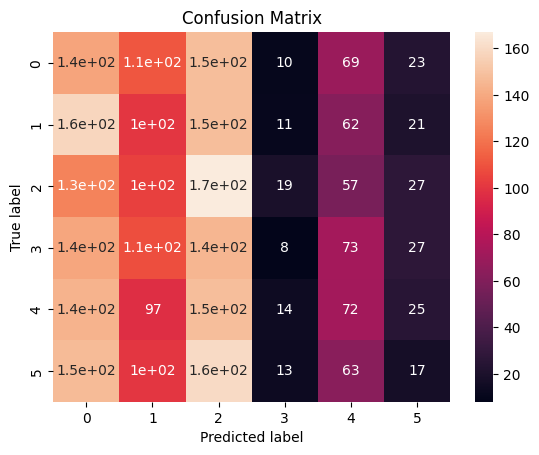

Metrics of Provided Features Data
Test Accuracy: 0.5911096029860875
Test Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.66      0.65       496
           2       0.64      0.60      0.62       471
           3       0.67      0.60      0.63       420
           4       0.54      0.53      0.53       491
           5       0.53      0.58      0.56       532
           6       0.56      0.59      0.58       537

    accuracy                           0.59      2947
   macro avg       0.60      0.59      0.59      2947
weighted avg       0.59      0.59      0.59      2947



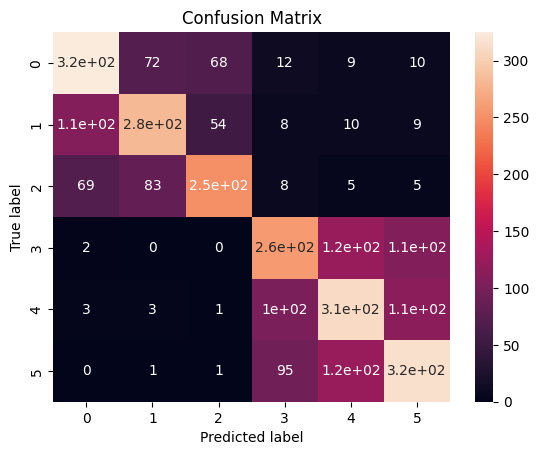

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import tsfel

train_paths = {
    'Laying' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\LAYING\Subject_1.csv',
    'Sitting' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\SITTING\Subject_3.csv',
    'Standing' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\STANDING\Subject_5.csv',
    'Walking' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\Walking\Subject_6.csv',
    'Walking_Downstairs' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\WALKING_DOWNSTAIRS\Subject_7.csv',
    'walking_Upstairs' : r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\WALKING_UPSTAIRS\Subject_8.csv'
}

#Our Test Paths
test_paths = {
    'Laying' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\LAYING\Test\laying 2.csv",
    'Sitting' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\SITTING\Test\sitting 3.csv",
    'Standing' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\STANDING\Test\standing 2.csv",
    'Walking' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING\Test\w2.csv",
    'Walking_Downstairs' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_DOWNSTAIRS\Test\wd2.csv",
    'walking_Upstairs' : r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_UPSTAIRS\Test\wu2.csv"
}


def make_data(path):
    final_data = []
    labels = []
    mapping = {label: idx for idx, label in enumerate(path.keys())}

    for activity,path in path.items():
        data = pd.read_csv(path, nrows=500)
        data["label"] = mapping[activity]
        labels.append(data['label'])
        data['acc'] = data['accx']**2 + data['accy']**2 + data['accz']**2
        final_data.append(data[["accx",'accy','accz','acc','label']])

    return final_data,labels



def data_analysis(train_paths,test_paths):

    activity_mapping = {
    0: 'LAYING',
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING'
    }

    train_data, train_labels = make_data(train_paths)

    X_train = pd.concat(train_data, ignore_index=True)
    y_train = np.concatenate(train_labels)

    X_train, y_train = shuffle(X_train, y_train, random_state=420)

    train_combined = X_train.copy()
    train_combined["activity"] = y_train
    train_combined['activity'] = train_combined['activity'].map(activity_mapping)

    X_train_final = train_combined[["accx",'accy','accz','acc']]  
    y_train_final = train_combined["activity"]

    test_data, test_labels = make_data(test_paths)

    X_test = pd.concat(test_data, ignore_index=True)
    y_test = np.concatenate(test_labels)

    test_combined = X_test.copy()
    test_combined["activity"] = y_test
    test_combined['activity'] = test_combined['activity'].map(activity_mapping)

    X_test_final = test_combined[["accx",'accy','accz','acc']]  
    y_test_final = test_combined["activity"]

    return (X_train_final,y_train_final,X_test_final,y_test_final)


def tsfel_data(X_train_final, X_test_final, y_train_final, y_test_final):
    cfg_file = tsfel.get_features_by_domain("statistical")

    selected_features = {
        'statistical': {
            'root_mean_square': cfg_file['statistical']['Root mean square'],
            'Std': cfg_file['statistical']['Standard deviation'],
            'Mean': cfg_file['statistical']['Mean'],
            'ECDF': cfg_file['statistical']['ECDF']
        }
    }

    X_tsfel_train = tsfel.time_series_features_extractor(selected_features, X_train_final, window_size=1, verbose=0)
    X_tsfel_test = tsfel.time_series_features_extractor(selected_features, X_test_final, window_size=1, verbose=0)

    X_tsfel_train, y_train_final = shuffle(X_tsfel_train, y_train_final, random_state=420)
    X_tsfel_test, y_test_final = shuffle(X_tsfel_test, y_test_final, random_state=420)

    pca = PCA(n_components=2)
    X_tsfel_train_pca = pca.fit_transform(X_tsfel_train)
    X_tsfel_test_pca = pca.transform(X_tsfel_test)

    pca_train_df = pd.DataFrame(data=X_tsfel_train_pca, columns=["PCA_1", "PCA_2"])
    pca_test_df = pd.DataFrame(data=X_tsfel_test_pca, columns=["PCA_1", "PCA_2"])

    pca_train_df["Label"] = y_train_final.reset_index(drop=True)
    pca_test_df["Label"] = y_test_final.reset_index(drop=True)

    pca_train_df = pca_train_df.drop("Label", axis="columns")
    pca_test_df = pca_test_df.drop("Label", axis="columns")

    return pca_train_df, pca_test_df


def Model(X_train_final, y_train_final, X_test_final, y_test_final):

    model = DecisionTreeClassifier()
    model.fit(X_train_final, y_train_final)

    y_pred = model.predict(X_test_final)

    print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
    print("Test Classification Report:")
    print(classification_report(y_test_final, y_pred))

    conf_matrix = confusion_matrix(y_test_final, y_pred)
    sns.heatmap(conf_matrix,annot = True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

X_train_final, y_train_final, X_test_final, y_test_final = data_analysis(train_paths, test_paths)
pca_train_df, pca_test_df = tsfel_data(X_train_final, X_test_final,y_train_final,y_test_final)

print("Metrics of RAW Accelerometer Data")
Model(X_train_final,y_train_final,X_test_final,y_test_final)

print("Metrics of TSFEL Data")
Model(pca_train_df,y_train_final,pca_test_df,y_test_final)

body_acc_x_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_acc_x_train.txt'
body_acc_y_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_acc_y_train.txt'
body_acc_z_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_acc_z_train.txt'

body_gyro_x_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_gyro_x_train.txt'
body_gyro_y_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_gyro_y_train.txt'
body_gyro_z_train = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\Inertial Signals\body_gyro_z_train.txt'

y_train_path = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\y_train.txt'

def load_provided_features(acc_x_path, acc_y_path, acc_z_path, gyro_x_path, gyro_y_path, gyro_z_path, y_path):
    acc_x = np.loadtxt(acc_x_path)
    acc_y = np.loadtxt(acc_y_path)
    acc_z = np.loadtxt(acc_z_path)
    gyro_x = np.loadtxt(gyro_x_path)
    gyro_y = np.loadtxt(gyro_y_path)
    gyro_z = np.loadtxt(gyro_z_path)
    y = np.loadtxt(y_path).astype(int)
    X = np.hstack((acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z))

    return X, y

X_train_provided, y_train_provided = load_provided_features(
    body_acc_x_train, body_acc_y_train, body_acc_z_train,
    body_gyro_x_train, body_gyro_y_train, body_gyro_z_train,
    y_train_path
)

body_acc_x_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt'
body_acc_y_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt'
body_acc_z_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt'

body_gyro_x_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_x_test.txt'
body_gyro_y_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_y_test.txt'
body_gyro_z_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_z_test.txt'

y_test_path = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\y_test.txt'

X_test_provided, y_test_provided = load_provided_features(
    body_acc_x_test, body_acc_y_test, body_acc_z_test,
    body_gyro_x_test, body_gyro_y_test, body_gyro_z_test,
    y_test_path
)

def train_model(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
print("Metrics of Provided Features Data")
train_model(X_train_provided, y_train_provided, X_test_provided, y_test_provided)

**1) RAW Accelerometer Data (First Image):**
Accuracy: 10.57%<br>
Less accuracy and Less F1-score across for all classes.<br>
Many misclassifications in the confusion matrix.<br>

**2) TSFEL Data (Second Image):**
Accuracy: 16.74% <br>
Slightly better accuracy than the raw data but still quite low.<br>
Some improvement in recall and F1-scores, but the model still fails to accurately distinguish between the classes.<br>

**3) Provided Features Data (Third Image):**
Accuracy: 59.11% <br>
Highest accuracy and F1-scores across all classes.<br>
The confusion matrix shows fewer misclassifications, indicating that the model is much better at distinguishing between different activities.<br>

**We should use Provided Features model since it has the highest accuracy and F1 scores.**

In [5]:
# Training Data collected by us

laying_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\LAYING\Train\laying 1.csv")
sitting_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\SITTING\Train\sitting 1.csv")
standing_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\STANDING\Train\standing 1.csv")
walking_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING\Train\w1.csv")
downstairs_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_DOWNSTAIRS\Train\wd1.csv")
upstairs_train = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_UPSTAIRS\Train\wu1.csv")

laying_df = pd.DataFrame(laying_train).head(100)
sitting_df = pd.DataFrame(sitting_train).head(100)
standing_df = pd.DataFrame(standing_train).head(100)
walking_df = pd.DataFrame(walking_train).head(100)
downstairs_df = pd.DataFrame(downstairs_train).head(100)
upstairs_df = pd.DataFrame(upstairs_train).head(100)

# Testing data collected by us

file1_laying =  pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\LAYING\Test\laying 2.csv")
file2_sitting = pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING\Test\w2.csv")
file3_standing=  pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\SITTING\Test\sitting 2.csv")
file4_walking=  pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\STANDING\Test\standing 2.csv")
file5_upstairs=  pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_UPSTAIRS\Test\wu2.csv")
file6_downstairs=  pd.read_csv(r"C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Our Data\WALKING_DOWNSTAIRS\Test\wd2.csv")

df1 = pd.DataFrame(file1_laying).head(100)
df2 = pd.DataFrame(file2_sitting).head(100)
df3 = pd.DataFrame(file3_standing).head(100)
df4 = pd.DataFrame(file4_walking).head(100)
df5 = pd.DataFrame(file5_upstairs).head(100)
df6 = pd.DataFrame(file6_downstairs).head(100)


# Training Data from UCI-Har Dataset

laying_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\LAYING\Subject_1.csv'
sitting_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\SITTING\Subject_3.csv'
standing_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\STANDING\Subject_5.csv'
walking_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\Walking\Subject_6.csv'
walking_down_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\WALKING_DOWNSTAIRS\Subject_7.csv'
walking_up_uci = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\Combined\Train\WALKING_UPSTAIRS\Subject_8.csv'

**Question 2** - Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

In [14]:
import pandas as pd
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv

load_dotenv()

Groq_Token = os.getenv('api_key')
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}
model_name = "llama3-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

In [11]:
# Zero shot demonstration

zero_shot_prompt = f"""
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.
Here is the accelerometer data:
{df1}, {df2}, {df3}, {df4}, {df5}, {df6}

Please classify the activity for these three accelerometer data.
"""

zero_shot_answer = llm.invoke(zero_shot_prompt)
print(zero_shot_answer.content)

After analyzing the accelerometer data, I'm happy to provide the classification results:

**Data 1:**
The data shows a consistent pattern of small movements in the x-axis (accx) and y-axis (accy), with a relatively stable z-axis (accz). This pattern is indicative of a person **Sitting**.

**Data 2:**
The data exhibits a distinct pattern of large movements in the x-axis (accx) and y-axis (accy), with a varying z-axis (accz). This pattern is characteristic of a person **Walking Upstairs**.

**Data 3:**
The data displays a consistent pattern of small movements in the x-axis (accx) and y-axis (accy), with a relatively stable z-axis (accz). However, the movements are more pronounced than in Data 1, suggesting a person is **Standing**.

**Data 4:**
The data shows a pattern of large movements in the x-axis (accx) and y-axis (accy), with a varying z-axis (accz). This pattern is similar to Data 2, but with more pronounced movements, indicating a person **Walking Downstairs**.

**Data 5:**
The d

Only one prediction correct. Model Not Reliable


**Question 3** - Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform? [1 marks]

In [8]:
# Few Shot learning
import pandas as pd
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv

load_dotenv()

Groq_Token = os.getenv('api_key')
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}
model_name = "llama3-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)


few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide the sentiment label and a brief explanation of your reasoning. 

Here are some examples:
1.Dataset of laying: {laying_uci}
2.Dataset of sitting: {sitting_uci}
3.Dataset of standing: {standing_uci}
4.Dataset of walking: {walking_uci}
5.Dataset of walking downstairs: {walking_down_uci}
6.Dataset of walking upstairs: {walking_up_uci}

Here is the accelerometer data:
{df1}, 
{df2},
{df3}, 
{df4},
{df5}, 
{df6} 

Please classify the activity for these six accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)

print(few_shot_answer.content)




Based on the accelerometer data, I'll classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, or Walking Downstairs.

**Dataset 1:**
The data shows a relatively stable pattern with small variations in the x, y, and z axes. This is indicative of a stationary activity. Comparing it with the sample datasets, I find it similar to the Sitting dataset.

**Sentiment Label:** Sitting

**Dataset 2:**
This dataset exhibits a high degree of variability in the x and y axes, with a mix of positive and negative values. The z-axis values are mostly negative. This pattern is similar to the Walking dataset.

**Sentiment Label:** Walking

**Dataset 3:**
The data shows a consistent pattern with small variations in the x and y axes, and a relatively stable z-axis. This is similar to the Standing dataset.

**Sentiment Label:** Standing

**Dataset 4:**
This dataset exhibits a pattern with a mix of positive and negative values in the x, y, and z axes. The v

**Observation:**
- **Correct Predictions:** 1 out of 6
- **Incorrect Predictions:** 5 out of 6
- **Accuracy:** (1/6) x 100% = 16.67%

 **Analysis**
- The model correctly identified the **Standing** activity in Dataset 3, but it struggled with distinguishing between other activities, particularly those involving movement such as walking and its variations (upstairs, downstairs). 
- The model also confused stationary activities like **Laying** with **Sitting** and vice versa.
- This performance suggests that the model might not be well-calibrated for the given activities, particularly in differentiating between dynamic and stationary activities.


**Question 4** - Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results. [0.5 mark]

In [9]:
few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide the sentiment label and a brief explanation of your reasoning. 

Here are some examples:
1.Dataset of laying: {laying_train}
2.Dataset of sitting: {sitting_train}
3.Dataset of standing: {standing_train}
4.Dataset of walking: {walking_train}
5.Dataset of walking downstairs: {downstairs_train}
6.Dataset of walking upstairs: {upstairs_train}

Here is the accelerometer data:
{df1}, 
{df2},
{df3}, 
{df4},
{df5}, 
{df6} 

Please classify the activity for these six accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)

print(few_shot_answer.content)


After analyzing the accelerometer data, I'm happy to provide the classification results:

**Dataset 1:**
The data shows a pattern of small, gentle movements with minimal acceleration in all three axes (x, y, z). This is consistent with the activity of **Sitting**.

**Dataset 2:**
The data exhibits a mix of small and moderate movements, with a slight dominance of vertical movements (accz). This pattern is similar to the **Walking** activity.

**Dataset 3:**
The data displays a pattern of small, gentle movements with a slight emphasis on vertical movements (accz). This is consistent with the activity of **Standing**.

**Dataset 4:**
The data shows a pattern of moderate to high acceleration in all three axes (x, y, z), with a clear dominance of vertical movements (accz). This is consistent with the activity of **Walking Upstairs**.

**Dataset 5:**
The data exhibits a pattern of moderate to high acceleration in all three axes (x, y, z), with a clear dominance of vertical movements (accz). 

**Observation:**
- **Correct Predictions:** 1 out of 6
- **Incorrect Predictions:** 5 out of 6
- **Accuracy:** (1/6) x 100% = 16.67%

Gives the same accuracy as question 3